In [1]:
from Bio import Entrez
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  


# PART 1

In [2]:
# collecting IDs of the search queries
def query_search(query, sample_size):
        Entrez.email = 'shikha.roy.stats@gmail.com'
        handle = Entrez.esearch(db='pubmed',
                                sort='relevance',
                                retmax=str(sample_size),
                                retmode='xml',
                                term=query)
        results = Entrez.read(handle)
        return results

#fetch query details corresponding to the query IDs
def query_info(id_list):
    ids = ','.join(id_list)
    Entrez.email = 'shikha.roy.stats@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                           retmode='xml',
                           id=ids)
    results = Entrez.read(handle)
    return results

In [3]:

queries = ['"Drug-Related Side Effects and Adverse Reactions"[Majr]',
           '"Congenital Abnormalities"[Majr]',
           '("Drug-Related Side Effects and Adverse Reactions"[Mesh] and "Congenital Abnormalities"[Mesh]) OR ("Drug-Related Side Effects and Adverse Reactions"[Majr] and "Congenital Abnormalities"[Majr])',
           'Other' 
          ]

targets = ['DR', 'CA', 'Both', 'Other']

keys = {'Queries':queries,'Target':targets}
keys = pd.DataFrame(keys)

In [4]:
keys

,Queries,Target
0,"""Drug-Related Side Effects and Adverse Reactio...",DR
1,"""Congenital Abnormalities""[Majr]",CA
2,"(""Drug-Related Side Effects and Adverse Reacti...",Both
3,Other,Other


In [9]:
df = []

for index, row in keys.iterrows():
    query = row[0]
    target = row[1]
    results = query_search(query, 4000)
    pmids = results['IdList']
    records = query_info(pmids)
    for pubmed in records['PubmedArticle']:
        article = pubmed['MedlineCitation']['Article']
        if 'Abstract' in article: 
            pmid = int(str(pubmed['MedlineCitation']['PMID']))
            abstract = abstract = article['Abstract']['AbstractText'][0]
            mesh = query
            # meshHeadings = pubmed_article['MedlineCitation']['MeshHeadingList']
            df.append({'PMID': pmid, 'Abstract': abstract, 'MESH': mesh, 'Target': target})
        else:
            pass

df = pd.DataFrame(df) 
df = df.drop_duplicates('PMID') # Drop duplicates, removing dupes from DR and CA from Both category

In [10]:
df

,PMID,Abstract,MESH,Target
0,33736223,Heavy metals pose a serious threat if they go ...,"""Drug-Related Side Effects and Adverse Reactio...",DR
1,33725933,The association between Glutathione S-transfer...,"""Drug-Related Side Effects and Adverse Reactio...",DR
2,33589101,Although statins are generally safe and well t...,"""Drug-Related Side Effects and Adverse Reactio...",DR
3,33571619,Acetaminophen (APAP) poisoning is the most com...,"""Drug-Related Side Effects and Adverse Reactio...",DR
4,33549839,Bifenazate is a novel acaricide for selective ...,"""Drug-Related Side Effects and Adverse Reactio...",DR
...,...,...,...,...
11168,31344544,Research on hexachlorobutadiene (HCBD) has inc...,Other,Other
11169,31234065,Bioindicators are promising tools used to dete...,Other,Other
11170,31163186,The purpose of this study is to assess some of...,Other,Other
11171,31162547,Somatic mutations in the ubiquitin-specific pe...,Other,Other


In [11]:
df.head()

,PMID,Abstract,MESH,Target
0,33736223,Heavy metals pose a serious threat if they go ...,"""Drug-Related Side Effects and Adverse Reactio...",DR
1,33725933,The association between Glutathione S-transfer...,"""Drug-Related Side Effects and Adverse Reactio...",DR
2,33589101,Although statins are generally safe and well t...,"""Drug-Related Side Effects and Adverse Reactio...",DR
3,33571619,Acetaminophen (APAP) poisoning is the most com...,"""Drug-Related Side Effects and Adverse Reactio...",DR
4,33549839,Bifenazate is a novel acaricide for selective ...,"""Drug-Related Side Effects and Adverse Reactio...",DR


In [12]:
df.shape

(11143, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11143 entries, 0 to 11172
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PMID      11143 non-null  int64 
 1   Abstract  11143 non-null  object
 2   MESH      11143 non-null  object
 3   Target    11143 non-null  object
dtypes: int64(1), object(3)
memory usage: 435.3+ KB


In [14]:
df.isna().sum()

PMID        0
Abstract    0
MESH        0
Target      0
dtype: int64

In [15]:
dupl_rows=df[df.duplicated()]
print('number of duplicate rows:', dupl_rows.shape)

number of duplicate rows: (0, 4)


In [16]:
df['Target'].value_counts()

Other    3986
DR       3286
CA       3148
Both      723
Name: Target, dtype: int64

In [17]:
# Percentage
DR = round(df.loc[df['Target']=='DR','Target'].count()/len(df)*100, 1)
CA = round(df.loc[df['Target']=='CA','Target'].count()/len(df)*100, 1)
Other = round(df.loc[df['Target']=='Other','Target'].count()/len(df)*100, 1)
Both = round(df.loc[df['Target']=='Both','Target'].count()/len(df)*100, 1)

print("Percentage of DR is :",DR,"\nPercentage of CA is :",CA,"\nPercentage of Other is :",Other,"\nPercentage of Both is :",Both)

Percentage of DR is : 29.5 
Percentage of CA is : 28.3 
Percentage of Other is : 35.8 
Percentage of Both is : 6.5


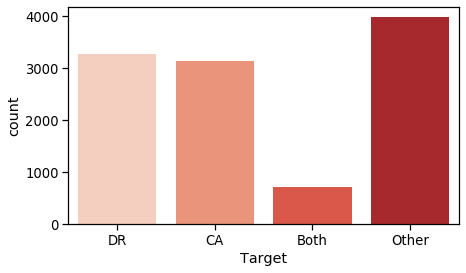

In [18]:
import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Target',data=df, palette="Reds")

In [19]:
df['MESH'].value_counts()

Other                                                                                                                                                                                               3986
"Drug-Related Side Effects and Adverse Reactions"[Majr]                                                                                                                                             3286
"Congenital Abnormalities"[Majr]                                                                                                                                                                    3148
("Drug-Related Side Effects and Adverse Reactions"[Mesh] and "Congenital Abnormalities"[Mesh]) OR ("Drug-Related Side Effects and Adverse Reactions"[Majr] and "Congenital Abnormalities"[Majr])     723
Name: MESH, dtype: int64

In [20]:
df1=df
df1.to_csv("df1.csv")

# PART 2

1.Text Cleaning & Feature Engineering

In [21]:
import string

In [22]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

In [23]:
#from nltk.tokenize import sent_tokenize
#df['Abstract'] = df['Abstract'].apply(lambda x : sent_tokenize(x))

In [24]:
#df['Abstract'].head()

In [25]:
#from nltk.probability import FreqDist
#fdist = FreqDist(tokenized_word)

In [26]:
stop = stopwords.words('english')
punctuation = string.punctuation

In [27]:
#df['punctuation_count'] = df['Abstract'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))
df['punctuation_count'] = df['Abstract'].apply(lambda x : len([a for a in x if a in punctuation]))


In [28]:
df['punctuation_count']

0         21
1        111
2         19
3         50
4         18
        ... 
11168     19
11169     38
11170     32
11171      7
11172     95
Name: punctuation_count, Length: 11143, dtype: int64

In [29]:
#Text cleaning
#converting to lower case
df['Abstract'] = df['Abstract'].apply(lambda x: " ".join(x.lower() for x in x.split())) 

In [30]:
df['Abstract'].head()

0    heavy metals pose a serious threat if they go ...
1    the association between glutathione s-transfer...
2    although statins are generally safe and well t...
3    acetaminophen (apap) poisoning is the most com...
4    bifenazate is a novel acaricide for selective ...
Name: Abstract, dtype: object

In [31]:
##removing punctuation
df['Abstract']=df['Abstract'].str.replace('[^\w\s]','')

In [32]:
#common word removal
#first 10 most common words
freq=pd.Series(' '.join(df['Abstract']).split()).value_counts()[:10]
freq

the     67939
of      59920
and     54898
in      38167
to      30392
a       22569
with    20447
for     13875
is      13021
that     9668
dtype: int64

In [33]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [34]:
df['Abstract_1'] = df['Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [35]:
freq=pd.Series(' '.join(df['Abstract_1']).split()).value_counts()[:10]
freq

patients      7481
study         5039
treatment     3687
liver         3621
clinical      2998
risk          2947
associated    2924
drug          2876
may           2848
disease       2566
dtype: int64

In [36]:
#removing digits
df['Abstract_1']=df['Abstract_1'].str.replace("[0-9]","")

In [37]:
from nltk.stem import PorterStemmer 
st = PorterStemmer()

In [38]:
#df['Abstract_1']=df['Abstract_1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#df['Abstract_1'].head()

In [39]:
#df.to_csv("C:\D Drive Data\pubmed\pubmed_bert\df.csv")

In [40]:
import unidecode

In [41]:
#convet unidecode string to closest match in ascii
df['Abstract_1'] = df['Abstract_1'].apply(lambda x: ' '.join([unidecode.unidecode(word) for word in x.split() ]))


In [42]:
##depend on length of abstarct 

df['word_count'] = df['Abstract_1'].apply(lambda x : len(x.split()))
df['char_count'] = df['Abstract_1'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df['total_length'] = df['Abstract_1'].apply(len)
df['num_unique_words'] = df['Abstract_1'].apply(lambda x: len(set(w for w in x.split())))
df['uniq_per_tot_words'] = df['num_unique_words'] / df['word_count']

In [43]:
# functions to get polatiy and subjectivity of text using the module textblob
def polarity(text):
    try:
        textblob = TextBlob(text)
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

def subjectivity(text):
    try:
        textblob = TextBlob(text)
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj


# change df_small to df to create these features on complete dataframe
df['polarity'] = df['Abstract_1'].apply(polarity)
df['subjectivity'] = df['Abstract_1'].apply(subjectivity)

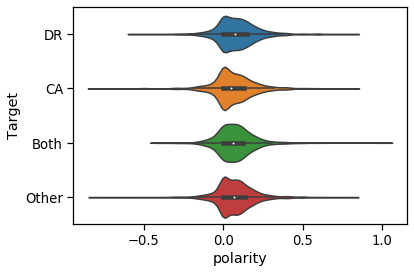

In [44]:
sns.violinplot(x='polarity', y='Target', data=df)


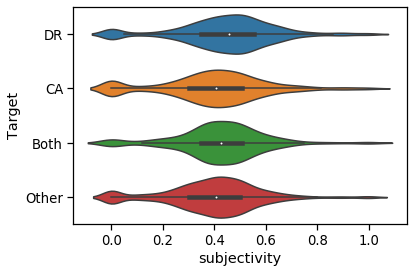

In [45]:
sns.violinplot(x='subjectivity', y='Target', data=df)


In [46]:
#lemmatization

from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['Abstract_1']=df['Abstract_1'].apply(lambda x: " ".join([lemmatizer.lemmatize(word, pos="v") for word in x.split()]))
df['Abstract_1'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shikha.roy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    heavy metal pose serious threat go beyond perm...
1    association glutathione stransferase pi gstp g...
2    although statins generally safe well tolerate ...
3    acetaminophen apap poison common cause drugind...
4    bifenazate novel acaricide selective foliar sp...
Name: Abstract_1, dtype: object

In [47]:
#import imblearn
#import sklearn
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(ratio='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

In [48]:
df.columns

Index(['PMID', 'Abstract', 'MESH', 'Target', 'punctuation_count', 'Abstract_1',
       'word_count', 'char_count', 'word_density', 'total_length',
       'num_unique_words', 'uniq_per_tot_words', 'polarity', 'subjectivity'],
      dtype='object')

In [49]:
df=df.drop(['PMID', 'Abstract', 'MESH'],axis=1)


In [50]:
df.columns

Index(['Target', 'punctuation_count', 'Abstract_1', 'word_count', 'char_count',
       'word_density', 'total_length', 'num_unique_words',
       'uniq_per_tot_words', 'polarity', 'subjectivity'],
      dtype='object')

In [318]:

mapping = {
    'DR': 0,
    'CA': 1,
    'Both': 2,
    'Other': 3
}

# Category mapping
df['Target_Code'] = df['Target']

df = df.replace({'Target_Code':mapping})


In [319]:
df['Target_Code'].value_counts()

3    3986
0    3286
1    3148
2     723
Name: Target_Code, dtype: int64

In [320]:
feature_cols=df.columns.difference(['Target','Target_Code'])
#X=df['Abstract_1']
#Y=df['Target']

In [53]:
#from sklearn.model_selection import StratifiedShuffleSplit

#strat_shuffle=StratifiedShuffleSplit(n_splits=1,test_size=1500,random_state=50)

#strat_shuffle.get_n_splits(X, Y)
#X_train=df.loc[train_idx,feature_cols]
#Y_train=df.loc[train_idx,target]

#X_test=df.loc[test_idx,feature_cols]
#Y_test=df.loc[test_idx,target]

#for train_index, test_index in strat_shuffle.split(X, Y):
 #   print("n_split","TRAIN:", train_index, "TEST:", test_index)
  #  X_train, X_test = X.loc[train_index], X.loc[test_index]
   # Y_train, Y_test = Y.loc[train_index], Y.loc[test_index]

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[feature_cols], df['Target_Code'], test_size=0.2, random_state=1)

In [322]:
X_train.isna().sum()

Abstract_1            0
char_count            0
num_unique_words      0
polarity              0
punctuation_count     0
subjectivity          0
total_length          0
uniq_per_tot_words    3
word_count            0
word_density          0
dtype: int64

In [56]:
Y_train.value_counts(normalize=True)

Other    0.358201
DR       0.293807
CA       0.282814
Both     0.065178
Name: Target, dtype: float64

In [323]:
Y_test.value_counts(normalize=True)

3    0.355765
0    0.299237
1    0.281292
2    0.063706
Name: Target_Code, dtype: float64

In [324]:
import sklearn
print(sklearn.__version__)

0.24.1


### 2. Features through TFDF Vectorizer ( word)

In [325]:
#Parameter election
ngram_range = (1,3)
min_df = 0.1
max_df = 1.

In [326]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [327]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        analyzer='word',
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
                        

In [328]:
X_tfidf_train = tfidf.fit_transform(X_train['Abstract_1']).toarray()
Y_tfidf_train = Y_train
print(X_tfidf_train.shape)
X_tfidf_test = tfidf.transform(X_test['Abstract_1']).toarray()
Y_tfidf_test = Y_test
print(X_tfidf_test.shape)

X_tfidf_train1 = pd.DataFrame(X_tfidf_train, columns=tfidf.get_feature_names())
#print(X_tfidf_train1)
X_tfidf_test1 = pd.DataFrame(X_tfidf_test, columns=tfidf.get_feature_names())


(8914, 43)
(2229, 43)


In [63]:
#  create a dictionary mapping the tokens to their tfidf values
#tfidf = dict(zip(vect_word.get_feature_names(), vect_word.idf_))
#tfidf = pd.DataFrame(columns=['title_word_tfidf']).from_dict(dict(tfidf), orient='index')
#tfidf.columns = ['title_word_tfidf']

In [64]:
# features with highest tf-idf (in title)
#tfidf.sort_values(by=['title_word_tfidf'], ascending=False).head(10)

### 3. Features through TFDF Vectorizer ( char )

In [329]:
#character wise TFDF
#character coming more than 50 % of the time
ngram_range = (4,8)
min_df = 0.4
max_df = 1.
tfidf_cr = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        analyzer='char',
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)

In [330]:
X_tfidf_crtrain = tfidf_cr.fit_transform(X_train['Abstract_1']).toarray()
Y_tfidf_crtrain = Y_train
print(X_tfidf_crtrain.shape)
X_tfidf_crtest = tfidf_cr.transform(X_test['Abstract_1']).toarray()
Y_tfidf_crtest = Y_test
print(X_tfidf_crtest.shape)
X_tfidf_crtrain1 = pd.DataFrame(X_tfidf_crtrain, columns=tfidf_cr.get_feature_names())
#print(X_tfidf_train1)
X_tfidf_crtest1 = pd.DataFrame(X_tfidf_crtest, columns=tfidf_cr.get_feature_names())


(8914, 58)
(2229, 58)


In [331]:
print(X_tfidf_crtrain1)

           com       con       dis       pat       pre       pro       res  \
0     0.000000  0.000000  0.000000  0.358827  0.274539  0.000000  0.000000   
1     0.135752  0.000000  0.359654  0.147849  0.000000  0.132721  0.000000   
2     0.108524  0.101217  0.000000  0.000000  0.112088  0.000000  0.293019   
3     0.243247  0.193919  0.096735  0.000000  0.234826  0.144231  0.000000   
4     0.126091  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8909  0.212242  0.000000  0.398971  0.000000  0.000000  0.000000  0.000000   
8910  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8911  0.199255  0.260870  0.000000  0.000000  0.288886  0.000000  0.107429   
8912  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8913  0.000000  0.133508  0.060905  0.142571  0.000000  0.127984  0.105093   

           stu      stud     study  ...      tion     tion     

In [344]:
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec

In [345]:
#glove_input_file='C:/D Drive Data/ML/glove/glove.6B.300d.txt'
#word2vec_output_file='glove.6B.300d.txt.word2vec'
#glove2word2vec(glove_input_file,word2vec_output_file)> (400000,100)
#model = gensim.models.KeyedVectors.load_word2vec_format('C:/D Drive Data/ML/glove/glove.6B.300d.txt', binary=True)

In [346]:
#from gensim.test.utils import common_texts, get_tmpfile
#from gensim.models import Word2Vec

In [347]:
#word to vector model
#convert the text into sentences
#X_train_wvc= [nltk.sent_tokenize(x) for x in X_train]
#sentwc=[ntlk.word_tokenize(x)]
#df['Abstract_sent'] = [nltk.word_tokenize(x) for x in df['Abstract_sent']]

#model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

In [348]:
#model = Word2Vec(X_train_wvc, size=150, window=8, min_count=0)

In [123]:
#words = model.wv.index2word
#wvs = model.wv[words]


#w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [151]:
#vocabulary = model.wv.vocab
#v1 = model.wv['syndrome']
#sim_words = model.wv.most_similar('syndrome')

In [112]:
#X_w2v_crtrain =  model.wv[words]
#Y_w2v_crtrain = Y_train
#print(X_w2v_crtrain.shape)
#X_w2v_crtest = model.transform(X_test).toarray()
#Y_w2v_crtest = Y_test
#print(X_w2v_crtest.shape)

In [ ]:
#model.save("word2vec.model")
#model.save("model.bin")

### 4. Features through Topic Modelling

In [332]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [333]:
#topic modelling
cvectorizer = CountVectorizer(min_df=2, max_features=4000, ngram_range=(1,10))
cvz = cvectorizer.fit_transform(X_train['Abstract_1'])
cvz_test= cvectorizer.transform(X_test['Abstract_1'])



In [334]:
#generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=25, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)

In [335]:
X_topics.shape

(8914, 25)

In [336]:
Y_topics = Y_train
X_topics_test= lda_model.transform(cvz_test)


In [337]:
X_topics_test.shape


(2229, 25)

In [338]:
#X_topics1 = pd.DataFrame(X_topics, columns=lda_model.get_feature_names())
#X_topics_test1 = pd.DataFrame(X_topics_test, columns=lda_model.get_feature_names())


In [339]:
import numpy as np

In [340]:
topic_summaries = []
n_top_words = 10


# get topics and topic terms
topic_word = lda_model.components_ 
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: heart | disease | events | congenital | adverse | pediatric | chd | cardiovascular | congenital heart | mortality
Topic 1: leave | pulmonary | artery | repair | aortic | right | undergo | coronary | postoperative | ventricular
Topic 2: study | effect | use | find | may | side | increase | participants | suggest | individuals
Topic 3: reactions | drug | pain | defect | hypersensitivity | adverse | adverse drug | adrs | drug reactions | study
Topic 4: disorder | cognitive | parent | examine | psychiatric | stroke | social | cortex | et | functional
Topic 5: cardiac | cardiotoxicity | isolate | use | species | strain | assay | dox | show | culture
Topic 6: increase | pregnancy | exposure | acid | women | plant | virus | may | growth | fetal
Topic 7: image | ad | diagnostic | ct | mri | disease | vitamin | aim | tomography | study
Topic 8: use | new | time | result | test | blood | develop | approach | method | high
Topic 9: qt | drug | interval | prolongation | qt interval | de |

In [341]:
X_topics=pd.DataFrame(X_topics)
X_topics=X_topics.rename(columns=lambda x:"topicmodel_"+str(x))

X_topics_test=pd.DataFrame(X_topics_test)
X_topics_test=X_topics_test.rename(columns=lambda x:"topicmodel_"+str(x))

In [342]:
X_tfidf_train.shape

(8914, 43)

In [343]:
X_topics.shape

(8914, 25)

In [344]:
X_train.columns

Index(['Abstract_1', 'char_count', 'num_unique_words', 'polarity',
       'punctuation_count', 'subjectivity', 'total_length',
       'uniq_per_tot_words', 'word_count', 'word_density'],
      dtype='object')

In [345]:
X_train.shape

(8914, 10)

In [346]:
8914*4

35656

In [347]:
#comibing all the features

#tfidf+topicmodelling
#X_train=pd.DataFrame(X_train)
#X_test=pd.DataFrame(X_test)

X_train_final=pd.concat([X_tfidf_train1,X_tfidf_crtrain1,X_topics],axis=1)
X_test_final=pd.concat([X_tfidf_test1,X_tfidf_crtest1,X_topics_test],axis=1)


In [348]:
X_train_final.shape

(8914, 126)

In [349]:
X_train_final.head()

,adverse,aim,also,among,assess,associate,case,cause,clinical,compare,...,topicmodel_15,topicmodel_16,topicmodel_17,topicmodel_18,topicmodel_19,topicmodel_20,topicmodel_21,topicmodel_22,topicmodel_23,topicmodel_24
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.356225,0.0,0.323379,0.0,...,0.001143,0.001143,0.001143,0.001143,0.001143,0.001143,0.001143,0.729150,0.001143,0.001143
1,0.000000,0.0,0.375302,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.233322,0.000476,0.363693
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.376762,0.0,0.000000,0.0,...,0.000404,0.000404,0.041900,0.060905,0.107910,0.000404,0.000404,0.000404,0.000404,0.000404
3,0.000000,0.0,0.000000,0.433188,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.127920,0.000348,0.000348,0.000348,0.015594,0.000348,0.000348,0.000348,0.000348,0.326570
4,0.339589,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.477357,0.0,...,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769,0.277582,0.000769,0.000769,0.000769


In [350]:
X_train_final.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)


In [351]:
X_test_final.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [352]:
X_train_final1=pd.concat([X_train,Y_train,X_train_final],axis=1)
X_train_final1.shape

(8914, 137)

In [353]:
X_test_final1=pd.concat([X_test,Y_test,X_test_final],axis=1)
X_test_final1.shape

(2229, 137)

In [355]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_dtype
X_test_final_cje=X_test_final1.apply(lambda x: x.fillna(x.mean()) if bool(is_string_dtype(x))==False and x.isnull().bool else x.fillna(x.value_counts().index[0]) if bool(is_string_dtype(x))==True and x.isnull().bool else x)
X_test_final_cje=X_test_final_cje.iloc[:,1:]


In [356]:
X_train_final_cje=X_train_final1.apply(lambda x: x.fillna(x.mean()) if bool(is_string_dtype(x))==False and x.isnull().bool else x.fillna(x.value_counts().index[0]) if bool(is_string_dtype(x))==True and x.isnull().bool else x)
X_train_final_cje=X_train_final_cje.iloc[:,1:]


In [362]:
X_train_final_cje_feature=X_train_final_cje.drop(['Target_Code'],axis=1)
Y_target=X_train_final_cje['Target_Code']

In [363]:
X_test_final_cje_feature=X_test_final_cje.drop(['Target_Code'],axis=1)
Y_target_test=X_test_final_cje['Target_Code']

### 5. Standardizing the data for SVD and PCA Feature Reduction

In [364]:
from sklearn.preprocessing import StandardScaler



In [365]:
sc = StandardScaler()
X = sc.fit_transform(X_train_final_cje_feature)

In [366]:
X_test= sc.fit_transform(X_test_final_cje_feature)

In [367]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80, random_state=0)

In [368]:
#X = pca.fit_transform(X)

In [382]:
#explained_variance = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative  SUM')

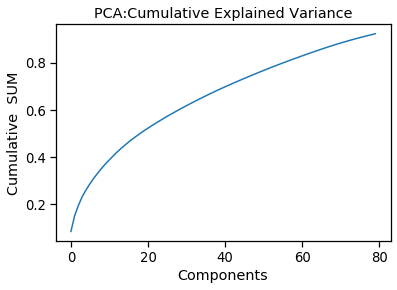

In [370]:
plt.plot(explained_variance)
plt.title("PCA:Cumulative Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative  SUM")

In [372]:
#plt.plot(range(80), pca.explained_variance_ratio_)
#plt.plot(range(80), np.cumsum(pca.explained_variance_ratio_))
#plt.title("Component-wise and Cumulative Explained Variance")

In [373]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=80, random_state=42)

In [374]:
pca.fit(X)
X_pca=pca.transform(X)

In [375]:
svd.fit(X)
X_svd=svd.fit_transform(X)


In [376]:

#testing data

X_svd_test=svd.fit_transform(X_test)

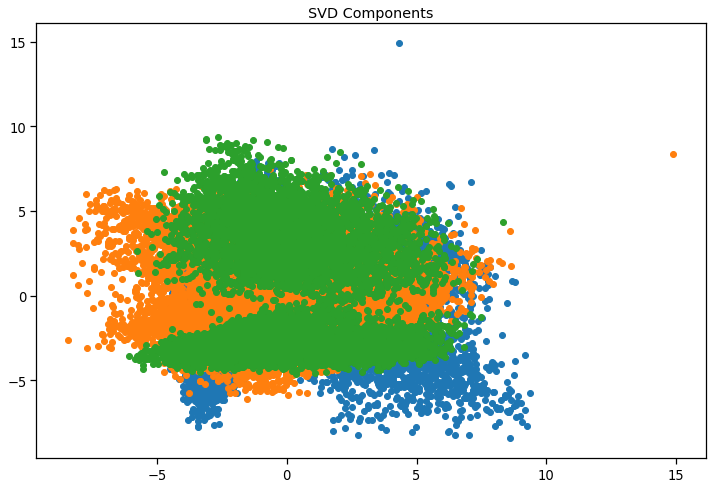

In [377]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(X_svd[:,0], X_svd[:,1])
plt.scatter(X_svd[:,1], X_svd[:,2])
plt.scatter(X_svd[:,2],X_svd[:,0])

In [378]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(X_train_final_cje_feature.values)

In [3]:
#plt.figure(figsize=(12,8))
#plt.title('t-SNE components')
#plt.scatter(tsne[:,0], tsne[:,1])
#plt.scatter(tsne[:,1], tsne[:,2])
#plt.scatter(tsne[:,2], tsne[:,0])

### 5. Model Building through Random Forest Classifier 

In [234]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [238]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='f1',
                                   cv=3, n_jobs=-1,
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_svd, Y_target)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Shikha.roy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, scoring='f1', verbose=1)

In [239]:

print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
nan


In [241]:
random_search1=random_search.best_estimator_
score= random_search1.score(X_svd, Y_target)
print(score)

0.8827686784832848


In [243]:
import pickle
filename = 'Model_best_randomsearch.sav'
pickle.dump(random_search1, open(filename, 'wb'))

In [245]:
Y_target.value_counts()/sum(Y_target.value_counts())

Other    0.358201
DR       0.293807
CA       0.282814
Both     0.065178
Name: Target, dtype: float64

In [246]:
1/Y_target.value_counts()

Other    0.000313
DR       0.000382
CA       0.000397
Both     0.001721
Name: Target, dtype: float64

### 6. Grid Search & Cross Validation

In [384]:

class_weight=[{0:0.000382,1:0.000397,2:0.001721,3:0.000313}]
#class_weight=[{0:0.000382,1:0.000397,2:0.001721,3:0.000313},{0:1,1:1,2:3,3:1}]

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 400, stop = 2000, num = 4)]
n_estimators=[1000]
# Number of features to consider at every split
max_features = ['sqrt']
#max_features = [20, 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
#max_depth.append(None)
max_depth=[10]

# Minimum number of samples required to split a node
min_samples_split = [5]
#min_samples_split = [10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
#min_samples_leaf= [5,10,15]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
#n_jobs= -1, 
oob_score= [True]
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
             'oob_score':oob_score,
             'class_weight':class_weight}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_svd, Y_target)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.000382, 1: 0.000397,
                                           2: 0.001721, 3: 0.000313}],
                         'max_depth': [10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [1000], 'oob_score': [True]},
             verbose=2)

In [385]:
best_RF = grid_search.best_estimator_
import pickle
filename = 'Model_best_RF2.sav'
pickle.dump(best_RF, open(filename, 'wb'))
RF_model_final = pickle.load(open(filename, 'rb'))

In [386]:

print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'class_weight': {0: 0.000382, 1: 0.000397, 2: 0.001721, 3: 0.000313}, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000, 'oob_score': True}

The mean accuracy of a model with these hyperparameters is:
0.6967682684639124


In [387]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(class_weight={0: 0.000382, 1: 0.000397, 2: 0.001721,
                                     3: 0.000313},
                       max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000, oob_score=True)

In [388]:
score= best_rfc.score(X_svd, Y_target)
print(score)

0.9233789544536684


In [389]:
best_rfc.fit(X_svd, Y_target)

rfc_pred = best_rfc.predict(X_svd)

In [390]:
rfc_pred_test = best_rfc.predict(X_svd_test)

### 7. Accuracy and Confusion Matrix

In [391]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The training accuracy is: ")
print(accuracy_score(Y_target, best_rfc.predict(X_svd)))

The training accuracy is: 
0.9232667713708773


In [392]:
score= best_rfc.score(X_svd, Y_target)
score_test= best_rfc.score(X_svd_test, Y_target_test)

In [393]:
score

0.9232667713708773

In [394]:
score_test

0.5711081202332885

In [395]:
from sklearn import metrics 

In [396]:
# Predcited probability of each class.
y_pred_prob_RF = best_rfc.predict_proba(X_svd_test)
# Predicted value of each class
y_pred_class_RF = best_rfc.predict(X_svd_test)

print(metrics.classification_report(Y_target_test, y_pred_class_RF))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       667
           1       0.56      0.49      0.52       627
           2       0.25      0.01      0.01       142
           3       0.56      0.67      0.61       793

    accuracy                           0.57      2229
   macro avg       0.49      0.45      0.44      2229
weighted avg       0.55      0.57      0.55      2229



In [397]:
# Predcited probability of each class.
#y_pred_prob_RF = RF_model_final.predict_proba(X_val)
# Predicted value of each class
#y_pred_class_RF = RF_model_final.predict(X_val)

#print(metrics.classification_report(Y_val, y_pred_class_RF))

In [398]:
print("The test accuracy is: ")
print(accuracy_score(Y_target_test, rfc_pred_test))

The test accuracy is: 
0.5711081202332885


In [399]:
# Classification report
print("Classification report")
print(classification_report(Y_target_test,rfc_pred_test))

Classification report
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       667
           1       0.56      0.49      0.52       627
           2       0.25      0.01      0.01       142
           3       0.56      0.67      0.61       793

    accuracy                           0.57      2229
   macro avg       0.49      0.45      0.44      2229
weighted avg       0.55      0.57      0.55      2229



In [405]:
final_test_pred = pd.concat([pd.DataFrame(y_pred_prob_RF),pd.DataFrame(y_pred_class_RF,columns=['new_labels'])], axis=1)
final_test_pred.to_csv("final_test_pred_RF.csv")

In [406]:
final_test_pred

,0,1,2,3,new_labels
0,0.172364,0.444172,0.101157,0.282307,1
1,0.398857,0.283816,0.124651,0.192676,0
2,0.161192,0.290760,0.059106,0.488942,3
3,0.393414,0.267829,0.109662,0.229095,0
4,0.165122,0.317210,0.083990,0.433678,3
...,...,...,...,...,...
2224,0.153331,0.432749,0.169673,0.244247,1
2225,0.181501,0.301787,0.067069,0.449644,3
2226,0.128314,0.426864,0.103819,0.341003,1
2227,0.223630,0.327526,0.215657,0.233188,1


In [407]:
from sklearn.metrics import multilabel_confusion_matrix

In [408]:
 multilabel_confusion_matrix(Y_target_test,final_test_pred['new_labels'])

array([[[1274,  288],
        [ 234,  433]],

       [[1357,  245],
        [ 318,  309]],

       [[2084,    3],
        [ 141,    1]],

       [[1016,  420],
        [ 263,  530]]], dtype=int64)

Text(0.5, 8.5, 'Predicted label')

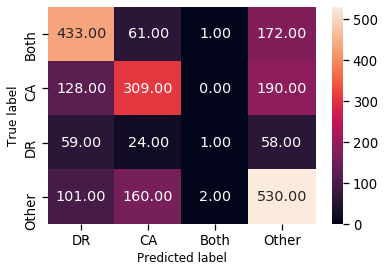

In [410]:
cm1 = metrics.confusion_matrix( Y_target_test,final_test_pred.new_labels )
sns.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = ['DR', 'CA','Both','Other'] , yticklabels = ['Both', 'CA','DR','Other'],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)